In [2]:
import re
import sys
from utils import findall
import matplotlib.pyplot as plt
import pandas as pd

LIMIT = None#10

In [3]:
# 1.1 addition of a unit
# Nie uznaję zdań lub słów jako unit. 
# Poniższy regex możliwe, że zbyt bardzo uogalnia, ale zachowuje standardową strukturę dodania - 
# zawsze jest dodaje się, potem nr jednostki i jest to zakończone ':'.
# W niektórych przypadkach 'w brzmieniu:' jest przeniesione do następnej linijki, z tego względu
# w regexie pojawia się (\n)?
r11 = r"(.*dodaje się.*[0-9]+.*)(\n)?(.*:)"
result11 = findall(r11,'data/ustawy',limit=LIMIT)
if LIMIT:
    for i in result11:
        print(i,len(result11[i]))
        print(i,result11[i])

In [4]:
# 1.2 removal of a unit
# JW. Struktura -> skreśla się, potem nr jednostki i zakończenie znakiem ';' lub ','
r12 = r"(.*\) skreśla się.*[0-9]+.*)(,|;)+"
result12 = findall(r12,'data/ustawy',limit=LIMIT)
if LIMIT:
    for i in result12:
        print(i,len(result12[i]))
        print(i,result12[i])

In [5]:
# 1.3 change of a unit
# JW. Struktura -> nr jednostki, potem otrzymują lub otrzymuje brzmienie
r13 = r"(§|\b[a-z]{3}\b)(.*otrzymuj)(e|ą)( brzmienie)"
result13 = findall(r13,'data/ustawy',limit=LIMIT)
if LIMIT:
    for i in result13:
        print(i,len(result13[i]))
        print(i,result13[i])

In [29]:
# 3 Plot results from point 1 showing how the percentage of amendments
# of a given type changed in the consecutive years.
results = dict()
for i,action in enumerate([result11,result12,result13]):
    for j in action:
        key_val = int(j.split('_')[0])
        if key_val not in results:
            results[key_val] = [0,0,0]
        results[key_val][i] += len(action[j])
results = pd.DataFrame(results).transpose().sort_index()

In [30]:
results['addition']=results[0]/results.sum(axis=1)
results['removal']=results[1]/results.sum(axis=1)
results['change']=results[2]/results.sum(axis=1)

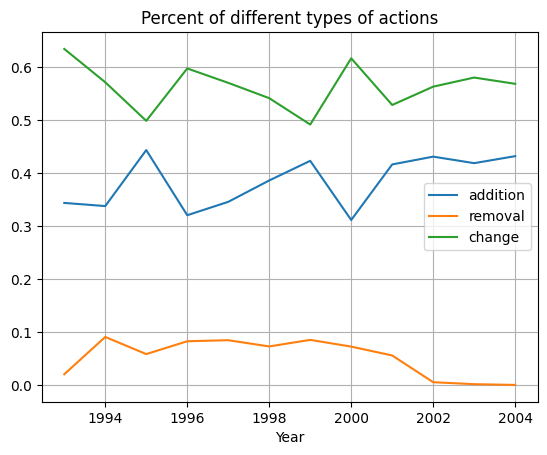

In [33]:
results[['addition','removal','change']].plot()
plt.title('Percent of different types of actions')
plt.xlabel('Year')
plt.grid()
plt.show()

In [41]:
# 4 Compute the total number of occurrences of the word ustawa
r4 = r"\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b"

result4 = findall(r4, 'data/ustawy', LIMIT)
print(sum([len(result4[i]) for i in result4]))

24934


In [42]:
# 5 Compute the total number of occurrences of the same word, followed by z dnia expression.
r5 = r"\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b z dnia"

result5 = findall(r5, 'data/ustawy', LIMIT)
print(sum([len(result5[i]) for i in result5]))

6935


In [43]:
# 6 As above, but not followed by z dnia expression
r6 = r"(\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b)(?! z dnia)"

result6 = findall(r6, 'data/ustawy', LIMIT)
print(sum([len(result6[i]) for i in result6]))

17999


In [46]:
# Tak, rezultaty się zgadzają
print(17999+6935)
print(24934)

24934
24934


In [47]:
# 7 Compute the total number of occurrences of the word ustawa in any inflectional form,
# excluding occurrences following o zmianie expression.
r7 = r"(?<!o zmianie )(\bustaw(?:a|y|ie|ę|ą|o|om|ami|ach|)\b)"

result7 = findall(r7, 'data/ustawy', LIMIT)
print(sum([len(result7[i]) for i in result7]))

24168


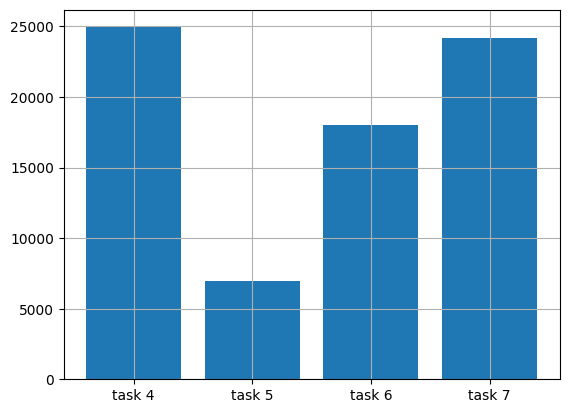

In [52]:
# 8 Plot results 4-7 using a bar chart.
plt.bar(
    [f"task {i}" for i in range(4,8)],
    [
        sum([len(result4[i]) for i in result4]),
        sum([len(result5[i]) for i in result5]),
        sum([len(result6[i]) for i in result6]),
        sum([len(result7[i]) for i in result7])
    ])
plt.grid()
plt.show()